# CNN 분류 모델의 필터와 특성맵 시각화

In [ ]:
from keras.models import save_model,load_model
import matplotlib.pyplot as plt
from keras.preprocessing import image
import numpy as np
resnet50= load_model('res_net50modelWpatience_camp7.h5')

# 모델 구조 (ResNet 50)

In [ ]:
resnet50.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d_3 (ZeroPadding2D (None, 230, 230, 3)  0           input[0][0]                      
__________________________________________________________________________________________________
conv2d_54 (Conv2D)              (None, 112, 112, 64) 9472        zero_padding2d_3[0][0]           
__________________________________________________________________________________________________
batch_normalization_54 (BatchNo (None, 112, 112, 64) 256         conv2d_54[0][0]                  
____________________________________________________________________________________________

# ResNet-50의 합성곱 층 개수 확인

In [ ]:
# summarize filter shapes
for layer in resnet50.layers:
    # check for convolutional layer
    if 'conv' not in layer.name:
        continue

# get filter weights
filters, biases = layer.get_weights()
print(layer.name, filters.shape)


# summarize filters in each convolutional layer
from matplotlib import pyplot
# load the model
layers=[]
# summarize filter shapes
for layer in resnet50.layers:
    # check for convolutional layer
    if 'conv' not in layer.name:
        continue
    # get filter weights
    filters, biases = layer.get_weights()
    print(layer.name, filters.shape)
    layers.append(layer.name)

dense_2 (2048, 392)
conv2d_54 (7, 7, 3, 64)
conv2d_55 (1, 1, 64, 64)
conv2d_56 (3, 3, 64, 64)
conv2d_57 (1, 1, 64, 256)
conv2d_58 (1, 1, 64, 256)
conv2d_59 (1, 1, 256, 64)
conv2d_60 (3, 3, 64, 64)
conv2d_61 (1, 1, 64, 256)
conv2d_62 (1, 1, 256, 64)
conv2d_63 (3, 3, 64, 64)
conv2d_64 (1, 1, 64, 256)
conv2d_65 (1, 1, 256, 128)
conv2d_66 (3, 3, 128, 128)
conv2d_67 (1, 1, 128, 512)
conv2d_68 (1, 1, 256, 512)
conv2d_69 (1, 1, 512, 128)
conv2d_70 (3, 3, 128, 128)
conv2d_71 (1, 1, 128, 512)
conv2d_72 (1, 1, 512, 128)
conv2d_73 (3, 3, 128, 128)
conv2d_74 (1, 1, 128, 512)
conv2d_75 (1, 1, 512, 128)
conv2d_76 (3, 3, 128, 128)
conv2d_77 (1, 1, 128, 512)
conv2d_78 (1, 1, 512, 256)
conv2d_79 (3, 3, 256, 256)
conv2d_80 (1, 1, 256, 1024)
conv2d_81 (1, 1, 512, 1024)
conv2d_82 (1, 1, 1024, 256)
conv2d_83 (3, 3, 256, 256)
conv2d_84 (1, 1, 256, 1024)
conv2d_85 (1, 1, 1024, 256)
conv2d_86 (3, 3, 256, 256)
conv2d_87 (1, 1, 256, 1024)
conv2d_88 (1, 1, 1024, 256)
conv2d_89 (3, 3, 256, 256)
conv2d_90 (1, 1, 2

In [ ]:
len(layers)

53

# 채널 시각화에 사용될 테스트 이미지 입력

In [ ]:
img_path = "테스트 이미지 경로"

img = image.load_img(img_path,target_size=(224,224))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor,axis = 0)
img_tensor /=255.

print(img_tensor.shape)

(1, 224, 224, 3)


### 첫 8개의층에 대한 활성화 채널 시각화

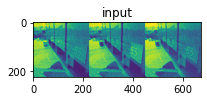

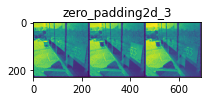

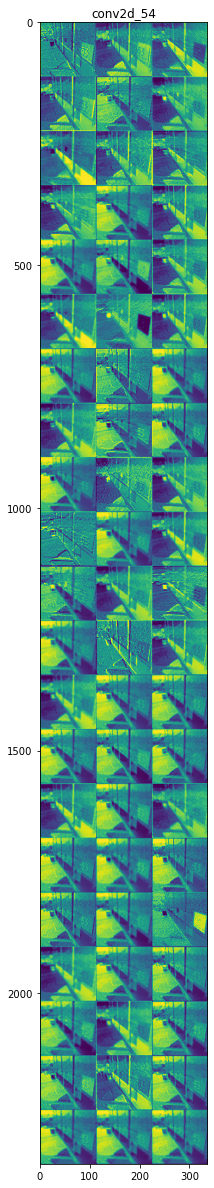

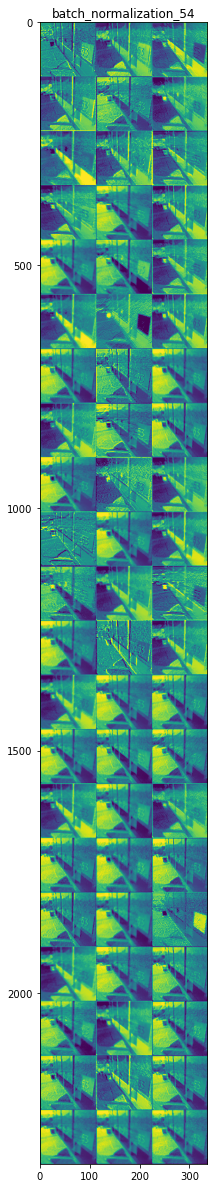

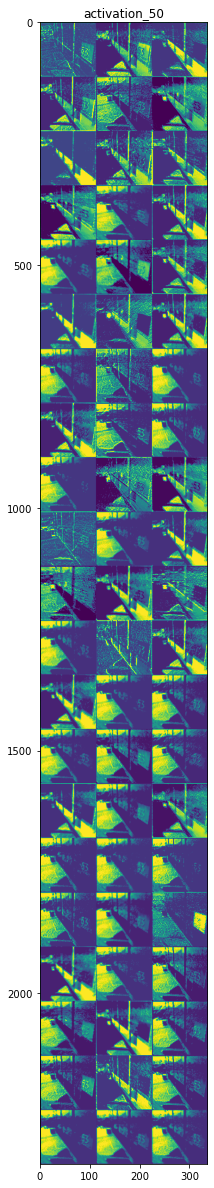

In [ ]:
# 층의 이름을 그래프 제목으로 사용합니다
layer_names = []
for layer in resnet50.layers[:8]:
    layer_names.append(layer.name)

images_per_row = 3

# 특성 맵을 그립니다
for layer_name, layer_activation in zip(layer_names, activations):
    # 특성 맵에 있는 특성의 수
    n_features = layer_activation.shape[-1]

    # 특성 맵의 크기는 (1, size, size, n_features)입니다
    size = layer_activation.shape[1]

    # 활성화 채널을 위한 그리드 크기를 구합니다
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # 각 활성화를 하나의 큰 그리드에 채웁니다
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            # 그래프로 나타내기 좋게 특성을 처리합니다
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    # 그리드를 출력합니다
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

plt.show()

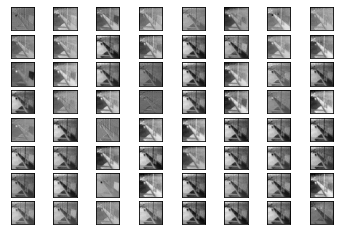

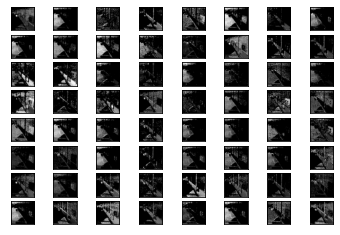

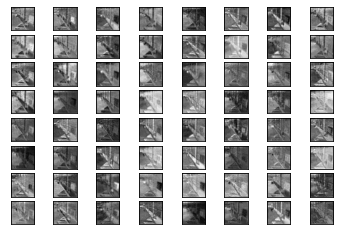

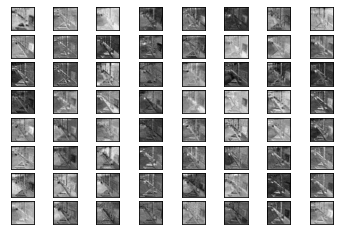

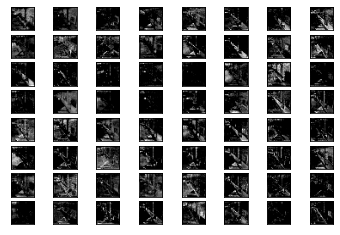

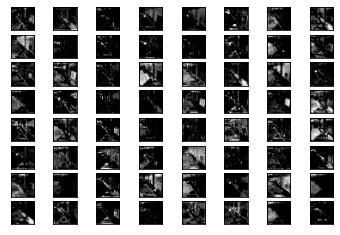

In [ ]:
from numpy import expand_dims
from keras.models import Model
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.resnet50 import preprocess_input

model = resnet50
# redefine model to output right after the first hidden layer
ixs = [2, 9, 22, 33, 41, 50] # 원하는 층 6곳
outputs = [model.layers[i].output for i in ixs]
model = Model(inputs=model.inputs, outputs=outputs)
# load the image with the required shape
img = image.load_img(img_path,target_size=(224,224))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor,axis = 0)
img_tensor /=255.
# get feature map for first hidden layer
feature_maps = model.predict(img_tensor)
# plot the output from each block
square = 8
for fmap in feature_maps:
    # plot all 64 maps in an 8x8 squares
    ix = 1
    for _ in range(square):
        for _ in range(square):
            # specify subplot and turn of axis
            ax = pyplot.subplot(square, square, ix)
            ax.set_xticks([])
            ax.set_yticks([])
            # plot filter channel in grayscale
            pyplot.imshow(fmap[0, :, :, ix-1], cmap='gray')
            ix += 1
    # show the figure
    pyplot.show()

# 필터 시각화

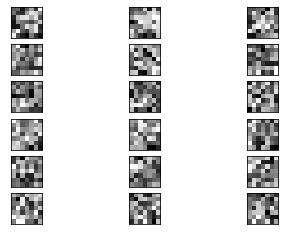

In [ ]:
# load the model
model = resnet50
# retrieve weights from the second hidden layer
filters, biases = model.layers[2].get_weights()
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
# plot first few filters
n_filters, ix = 6, 1
for i in range(n_filters):
    # get the filter
    f = filters[:, :, :, i]
    # plot each channel separately
    for j in range(3):
        # specify subplot and turn of axis
        ax = pyplot.subplot(n_filters, 3, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        pyplot.imshow(f[:, :, j], cmap='gray')
        ix += 1
# show the figure
pyplot.show()